In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import joblib
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [22]:
iris = pd.read_csv("IRIS_ Flower_Dataset.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [33]:
iris.groupby('species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                        mean median        mean median         mean median   
species                                                                      
Iris-setosa            5.006    5.0       3.418    3.4        1.464   1.50   
Iris-versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
Iris-virginica         6.588    6.5       2.974    3.0        5.552   5.55   

                petal_width         
                       mean median  
species                             
Iris-setosa           0.244    0.2  
Iris-versicolor       1.326    1.3  
Iris-virginica        2.026    2.0

# See information about Iris dataset

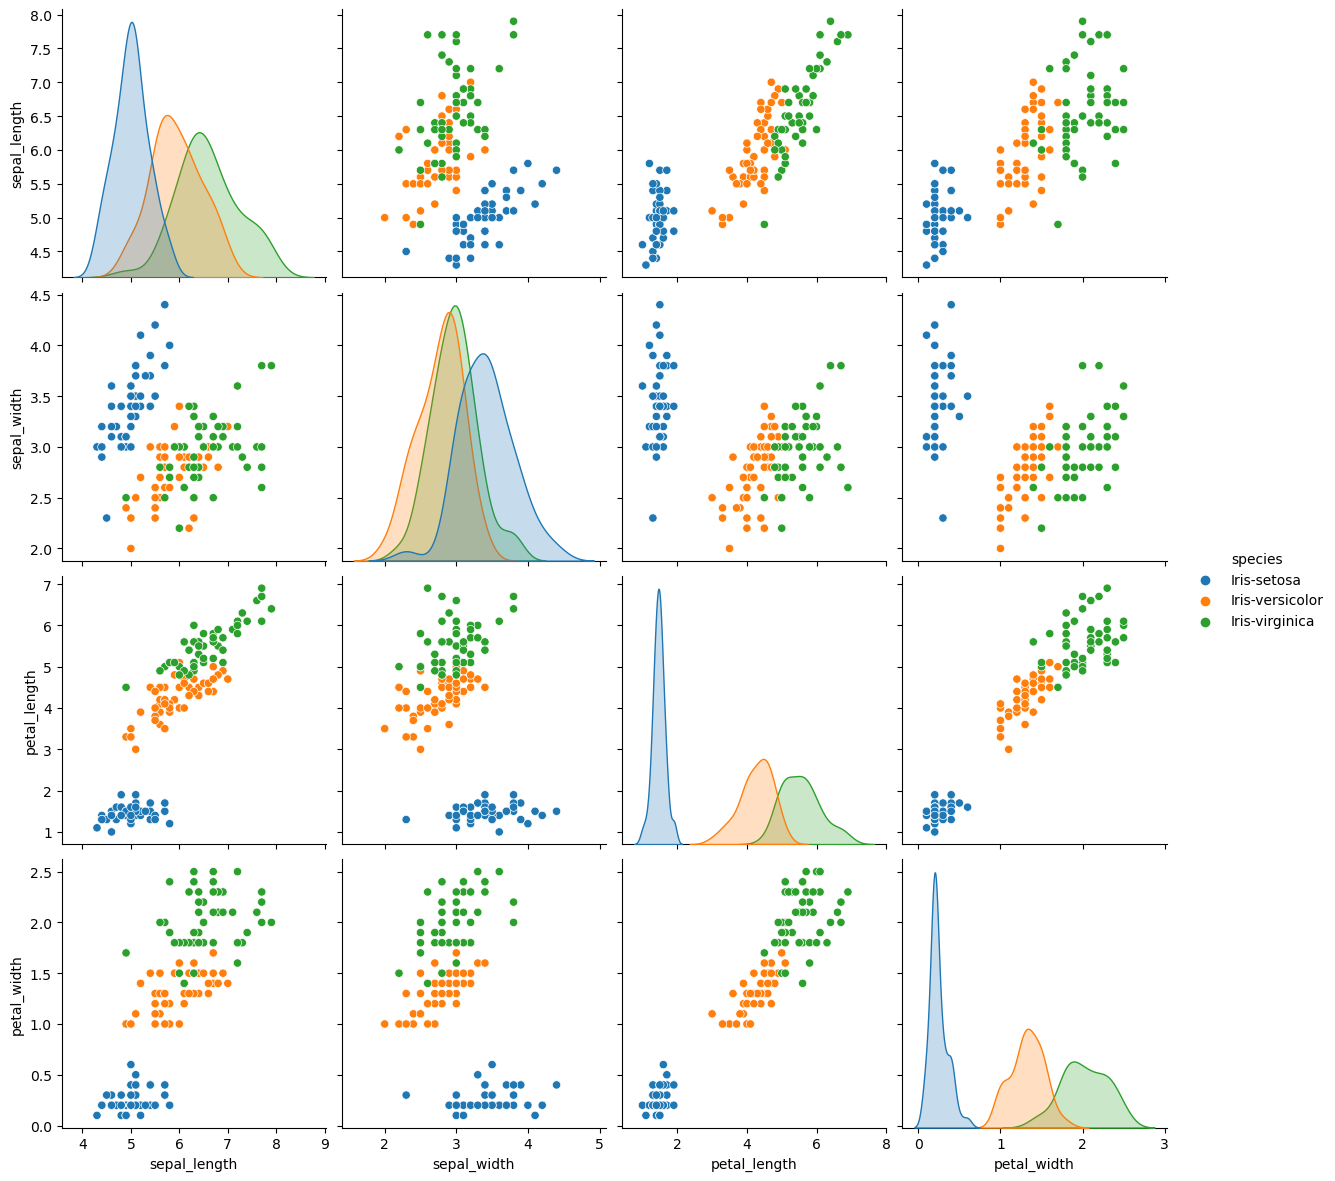

In [29]:
sns.pairplot(iris,hue='species',height=3)

C:\Users\victo\AppData\Local\Temp\ipykernel_17136\2371664674.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),cmap='coolwarm',annot=True)


<Axes: >

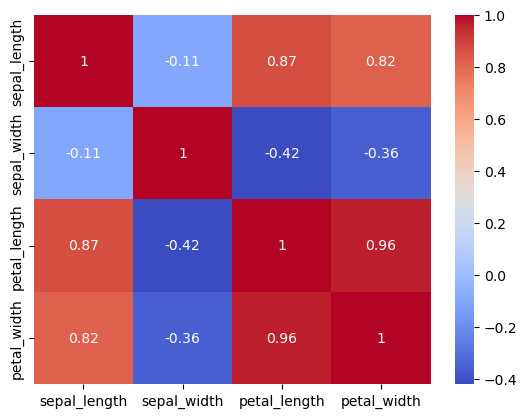

In [32]:
sns.heatmap(iris.corr(),cmap='coolwarm',annot=True)

# Splitting the data

In [63]:
species_dict = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}

target = iris['species'].replace(species_dict).astype('int')
features = iris.drop('species', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25)

# Creating the model and Training

In [40]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [61]:
def accuracy_percentage(prediction):
    correct = sum(prediction == y_test.values)
    return correct * 100 / len(prediction)

def plot_confusion_matrix(cm, n_estimators):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
    plt.title(f'Confusion Matrix with {n_estimators} as hyperparameter')
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(y_test)))
    plt.xticks(tick_marks, np.unique(y_test))
    plt.yticks(tick_marks, np.unique(y_test))
    plt.ylabel('True values')
    plt.xlabel('Predictions')
    plt.show()
    
def train_and_predict(n_estimators):
    clf = RandomForestClassifier(n_estimators, criterion="entropy",random_state=123)
    clf.fit(x_train, y_train)
    return clf.predict(x_test)

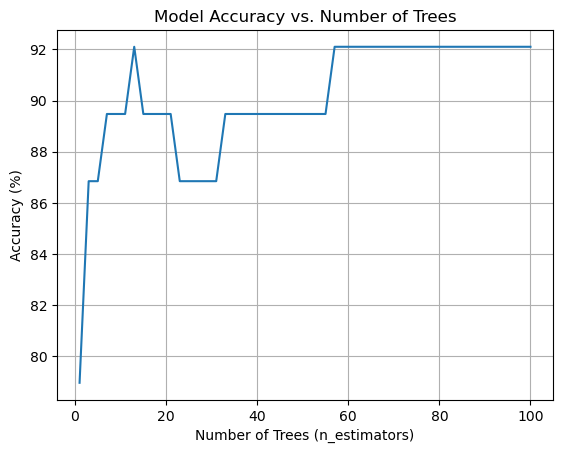

In [67]:
accuracy_percentages = []

n_values = np.linspace(1,100,num=50).astype(int)  
for n in n_values:
    predi = train_and_predict(n)
    accuracy_percentages.append(accuracy_percentage(predi))
    #cm = confusion_matrix(y_test, predi)
    #plot_confusion_matrix(cm,n)

plt.plot(n_values, accuracy_percentages)
plt.title('Model Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

In [58]:
print(accuracy_percentages)

[92.10526315789474, 94.73684210526316, 92.10526315789474, 97.36842105263158, 97.36842105263158, 94.73684210526316, 97.36842105263158, 100.0, 94.73684210526316, 97.36842105263158, 100.0, 100.0, 100.0, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 100.0, 100.0, 94.73684210526316, 100.0, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 100.0, 97.36842105263158, 97.36842105263158, 100.0, 100.0, 100.0, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 97.36842105263158, 94.73684210526316, 97.36842105263158, 97.36842105263158]


# Saving the Model

In [59]:
model = RandomForestClassifier(30,criterion="entropy")
model.fit(x_train,y_train)

joblib.dump(model, 'model_file.pkl')

['model_file.pkl']